In [1]:
import pandas as pd

In [63]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import os     


In [2]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [4]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
test = pd.read_csv('03_santander_test.csv', index_col='ID')

In [6]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [7]:
y = list(train['TARGET'])

In [8]:
train = train.drop('TARGET', axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 369 entries, var3 to var38
dtypes: float64(111), int64(258)
memory usage: 214.6 MB


In [10]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Data columns (total 369 columns):
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64
imp_op_var39_efect_ult1          76020 non-null float

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier


In [19]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dtc, feature_names=train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0f\xc7\x00\x00\x03\x07\x08\x06\x00\x00\x00\x1e\xfd\xb7)\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7fpW\xf5\xbd\'\xfe\xa7\x181`D\xd4\x88%H\x05\x7f@\x00\xe1\xd2"\xb2Y\x08\x10rSg:z\xb9\xba\xbdL\xe7\xd2\x8d\xb3\xba\xbd_\xdd\x8e\x1d{\xbb\xd2\x0ew\xc7\xbb\xcb\xdda,\xf6\xdeK\xbf\xce]\x9d\xed\xb6;f/~\xbd\xed\x1d]V\xc7\x99\x9a\x86\x18\x02e\x10\xb5,(\x82U\xc0b\x001JLS\x8c\xb9Q\xbe\x7f\xd0|$\xf2\x1b\xc1\x0f\xea\xe31\x93\xf1s\xde\xe7\xfd>\xe7\xf5>\x9f\x8c\xff\x84\xe7y\x9d\xb5\x7f\xff\xfe\xfd\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x803\xd8\x80b\x17\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc7"\x1c\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x19O8\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x803^I\xb1\x0b\x00\x00\x00\x00\x00\x00\x00N\xbd\xde\xde\xde\xfc\x9f\xff\xf3\x7f\xf2\xfe\xfb\xef\x17\xbb\x148\xed\xfe\xd5\xbf\xfaW\x199rd\xb1\xcb\x00\x00\x00\x00\x00\x00\x00\x00N3\xe1x\x00\x00\x00\x00\x00\x00\xf8\x0cz\xe2\x89\'\xf2o\xfe\xcd\xbf)v\x19\xf0\x89\xf8w\xff\xee\xdf\xe5\xa7?\xfdi\xb1\xcb\x00\x00\x00\x00\x00\x00\x00\x00N3\xe1x\x00\x00\x00\x00\x00\x00\xf8\x0c\xda\xb7o_\x92d\xe7\xe2\x9a"W\x02\xa7\xd7\xb7\xfeiS\xde{\xef\xbdb\x97\x01\x00\x00\x00\x00\x00\x00\x00|\x02\x06\x14\xbb\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\x16\xe1x\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcex\xc2\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9c\xf1\x84\xe3\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\xe3\t\xc7\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00p\xc6\x13\x8e\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x8c\'\x1c\x0f\x00\x00\x00\x00\x00\x00|l\xed]=Y\xbeaOni\xd8xJ\xe6\x01\x00\x00\x00\x00\x00\x00\x00\xc0G\x95\x14\xbb\x00\x00\x00\x00\x00\x00\x00\xe0\xd3\xef\x87M\xdb\xd3\xb0\xb6\xed\x94\xcd;S\xb5w\xf5\xe4\xa7k\xda\xb2\xb4y{\x92\xe4\x81\xafO\xc8\xdcI\xc3\x0e\x99\xd7\xb8\xb9=\xff\xf8\xcc\xae$\xc97\xae\x1b\x9e\xba\xca\xf2O\xb2\xcccj\xeb\xe8\xce\xfd-\xbfM\xc3\xda\xb6\xd4O\x1b\x91\x1b\xae\xb9$3\xae\xbc\xf0\xb8\xd6\xf6\xed\xadqs{\xea*\xcbs\xf3\xe4K\xfb=\x83\xf6\xae\x9e\xfc\xe2\xa5\xf6\xdc\xfd\xd8\x96$G~F\x9bvu\xe5\x8f\xef_W8\xae\x9f6"\xf7\xce\x1d\xf31w\x06\x00\x00\x00\x00\x00\x00\x00|\x96\xe9\x1c\x0f\x00\x00\x00\x00\x00\x00|l\xc7\x1bj\xfe4\x87\x9f\xdb\xbbz\xf2\xda\xde\xee,\xa8\x1b\x9d\x9d\x8bk\xf2\xc0\xd7\'\xe4\x8eG^\xcc\x83\xabv\xf4\x9b\xb7|\xc3\x9e\xfc\xe33\xbbr\xff\xbcq\xb9\x7f\xde\xb84my;\xcb\xd6\xed\xfcX\xf7\xde\xb4\xab+K\x1a\xb7}\xack\xf4\xe9\xec\xee\xcd\xa6\xdd]\xb9w\xee\x98l\xbe\xa7:U\xa3\x87f\xdeO\xd6\xa7qs\xfb1\xd7>\xb8jGni\xd8\x98\xef\xfd\xe1\x19|\xafnt\xbfg\xd0\xd9\xdd\x9b\xef>z \x14\xbfsqM6,\x9c\x9eG\xd7\xbfq\xd8\xda\x7f\xfdzg\xbf\xe3\xda\xb1\x17\x9d\x82\xdd\x01\x00\x00\x00\x00\x00\x00\x00\x9fe\xc2\xf1\x00\x00\x00\x00\x00\x00\x00\xc7\xe1\xb5\xbd\xdd\x992rH\xe1\xb8\xaf\x1b\xfa\xa2\'_)\x8c\xb5ut\xe7\x8eG^\xcc\xb7k.\xcf\x90\xd2\x92\x0c)-I\xfdu\x15\xb9\xfb\xb1-\xd9\xb4\xab\xeb\x84\xee\xd7\xde\xd5\x93\xe5\x1b\xf6\xe4\xfb\xcb_\xceo\xde\xdc\x97[\xabF\x9c\x92}\xac\xdd\xdeQ\xe8d?\xa4\xb4\xa4\xb0\x8f[\x1a6\x1esm\xdf^\xc7\x0f/\xeb\xf7\xdf5[;\x92$\xcd/\xbf\x9d\xc6\xcd\xed\xb9q\xe2\x81k\x96\x97\r\xcc\xf7\xeaFgi\xf3\xf6\xaczuo\xbfk\r;\x7f`v.\xae)\xfc\xf4\xd5\x04\x00\x00\x00\x00\x00\x00\x00p$\xc2\xf1\x00\x00\x00\x00\x00\x00@\xc1\x83\xabv\xa4bas\x96\xad\xdb\x99\xf6\xae\x9eT,l.\x9c\xeb\xec\xee\xcd\xb2u;S\xb1\xb09\x15\x0b\x9b\xb3\xa4q[\xda\xbbz\x8ez\xbd\xce\xee\xde,\xdf\xb0\'\x15\x0b\x9bsK\xc3\xc6lm\xdfw\xccy\x07\xdf\xffD<\xb7\xa3\xb3\xb0\xbe\xef\xe7\xa3\xfb\xaaX\xd8\x9c\xb6\x8e\xee\xa3\xee\xa5\xbd\xab\'\x8d\x9b\xdbsK\xc3\xc6tv\xf7\xe6\xfb\xcb_\xce\x92\xc6m\xfd\x82\xf1}5\'\xc9]5\xa3\nc\xcf\xfe\xf6@7\xf4/\x9c?\xb006\xec\x0f\x9f?\xda)\xfdH\xfa\xba\xc4\xfftM[\xae\xbedp\xee\x9d;&s\'\rKy\xd9\xc0c/>\x0eG\n\xa1\xd7O;v\xf8\xfe\x9e\xaf^\x95\xe4\xc0\xb3N\x0e\xbc\x0c I\xbeW7:I\xf2\xe8\xfa7\x92\x

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [146]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

dtc2 = DecisionTreeClassifier(max_depth=20)
dtc2.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr2 = LogisticRegression(penalty='l1', C=0.5)
lr2.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
lr2 = LogisticRegression(penalty='l1', C=0.5)
lr2.fit(X_train, y_train)

In [116]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [117]:
import matplotlib.pyplot as plt

In [118]:
roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1])

0.7975485796471028

In [119]:
roc_auc_score(y_test, dtc2.predict_proba(X_test)[:,1])

0.6911729762751885

In [120]:
accuracy_score(y_test, dtc.predict(X_test))

0.9600988559811855

In [121]:
accuracy_score(y_test, dtc2.predict(X_test))

0.9458683780444055

In [122]:
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])

In [123]:
fpr_dtc2, tpr_dtc2, thresholds = roc_curve(y_test, dtc2.predict_proba(X_test)[:,1])

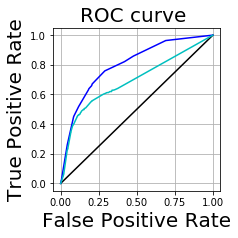

In [124]:
plt.figure(figsize=(3,3))
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_dtc,tpr_dtc, c='b')
plt.plot(fpr_dtc2,tpr_dtc2, c='c')
plt.title('ROC curve ', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

In [125]:
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

0.5316008711537972

In [126]:
roc_auc_score(y_test, knn2.predict_proba(X_test)[:,1])

0.6159533996539908

In [127]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

In [128]:
fpr_knn2, tpr_knn2, thresholds = roc_curve(y_test, knn2.predict_proba(X_test)[:,1])

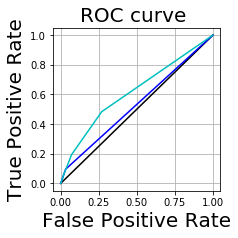

In [129]:
plt.figure(figsize=(3,3))
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_knn,tpr_knn, c='b')
plt.plot(fpr_knn2,tpr_knn2, c='c')
plt.title('ROC curve ', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

In [143]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.5986479787208382

In [147]:
roc_auc_score(y_test, lr2.predict_proba(X_test)[:,1])

C:\Users\Konstantin\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.7805600462261282

In [148]:
accuracy_score(y_test, lr.predict(X_test))

0.9604974688085463

In [149]:
accuracy_score(y_test, lr2.predict(X_test))

0.9598198270020329

In [150]:
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

In [151]:
fpr_lr2, tpr_lr2, thresholds = roc_curve(y_test, lr2.predict_proba(X_test)[:,1])

C:\Users\Konstantin\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


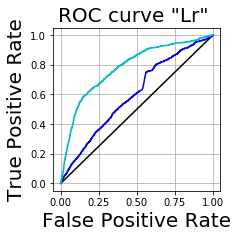

In [154]:
plt.figure(figsize=(3,3))
plt.plot(np.arange(0.,1.,1e-5),np.arange(0.,1.,1e-5), c='black')
plt.plot(fpr_lr,tpr_lr, c='b')
plt.plot(fpr_lr2,tpr_lr2, c='c')
plt.title('ROC curve "Lr" ', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.grid()

https://www.kaggle.com/cast42/exploring-features